## Zuber Plataforma

Estás trabajando como analista para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. Tu tarea es encontrar patrones en la información disponible. Quieres comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

Al trabajar con una base de datos, analizarás los datos de los competidores y probarás una hipótesis sobre el impacto del clima en la frecuencia de los viajes.

## Diccionario de Datos

Una base de datos con información sobre viajes en taxi en Chicago: <br>
<br>
DataSet Companies(project_sql_results_01):
- company_name: datos sobre los nombres de las empresas de taxis
- trips_amount: el numero de vaijes de cada compañia de taxis, el 15 y 16 de Noviembre del 2017

DataSet Trips (project_sql_results_04):
- dropoff_location_name: barrios de Chicago donde finalizaron los viajes.
- average_trips: datos sobre el promedio de vaijes que terminaron en cada barrio en noviembre de 2017

DataSet loop_ohare (project_sql_results_07):
- start_ts: fecha y hora de la recogida
- weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje
- duration_seconds: duración del viaje en segundos

# 1. Inicializacion

In [6]:
# Cargar todas las librerias
import pandas as pd
import numpy as np
from scipy import stats
from math import factorial
import seaborn as sns
from matplotlib import pyplot as plt

### 1.1 Cargar Datos

In [ ]:
# Carga de archivos de datos en diferentes DataFrames
df_companies = pd.read_csv('project_sql_result_01.csv')
df_trips = pd.read_csv('project_sql_result_04.csv')
df_loop_ohare = pd.read_csv('project_sql_result_07.csv')

# 2. Preparar los Datos

### 2.1 Revision de Datos / Columnas

In [ ]:
# Revision de los datos en cada Dataframe
# Primero, el DataFrame df_companies: 
df_companies.info()
print()
print(df_companies.isnull().sum())
print()
print(df_companies.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB

company_name    0
trips_amount    0
dtype: int64

                            company_name  trips_amount
14  Patriot Taxi Dba Peace Taxi Associat          2235
27              Service Taxi Association           402
21                       American United          1404
12             Dispatch Taxi Affiliation          3355
37                1469 - 64126 Omar Jada            36
31      American United Taxi Affiliation           210
17          Chicago Medallion Management          1955
11                            Globe Taxi          4383
41                  Chicago Star Taxicab            29
39           0118 - 42111 Godfrey S.Awir            33


In [9]:
# Ahora, el DataFrame df_trips
df_trips.info()
print()
print(df_trips.isnull().sum())
print()
print(df_trips.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB

dropoff_location_name    0
average_trips            0
dtype: int64

   dropoff_location_name  average_trips
71           Edison Park      14.166667
24            West Ridge     298.333333
77        Archer Heights       8.366667
26             Hyde Park     255.133333
59               Chatham      23.200000
44        Belmont Cragin      59.033333
60              New City      22.933333
46             Chinatown      52.433333
87               Pullman       3.896552
83           Avalon Park       6.966667


In [10]:
# Ahora, el DataFrame df_loop_ohare
df_loop_ohare.info()
print()
print(df_loop_ohare.isnull().sum())
print()

# Integridad de los datos
df_loop_ohare['duration_seconds'] = df_loop_ohare['duration_seconds'].astype(int)
df_loop_ohare['start_ts'] = pd.to_datetime(df_loop_ohare['start_ts'])

# Muestra de resultados
print(df_loop_ohare.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

               start_ts weather_conditions  duration_seconds
354 2017-11-25 11:00:00               Good              7440
590 2017-11-04 12:00:00               Good              2460
129 2017-11-11 07:00:00               Good              1384
621 2017-11-25 18:00:00               Good              2345
162 2017-11-11 03:00:00               Good              1162
741 2017-11-04 04:00:00               Good              1595
594 2017-11-11 08:00:00               Good              1417
284 2017-11-11 06:00:

Para los DataFrames df_companies y df_trips, no se encontraron discrepancias en los datos, por lo que se puede proseguir al analisis de los mismos. <br>Para el caso del DataFrame df_loop_ohare, se cambio el tipo de datos float a int, siendo mas optimo para su posterior analisis, y asegurando que todos los datos de la columna "start_ts" se encuentren en formato datetime. 

# 3. Analisis de Datos

### 3.1 Principales barrios por finalizacion del recorrido

In [11]:
# Identificar los 10 Principales barrios en terminos de finalizacion del recorrido
top_neighborhoods = df_trips.groupby(by='dropoff_location_name')['average_trips'].sum()
top_neighborhoods = top_neighborhoods.sort_values(ascending=False)
print(top_neighborhoods.head(10))

dropoff_location_name
Loop                  10727.466667
River North            9523.666667
Streeterville          6664.666667
West Loop              5163.666667
O'Hare                 2546.900000
Lake View              2420.966667
Grant Park             2068.533333
Museum Campus          1510.000000
Gold Coast             1364.233333
Sheffield & DePaul     1259.766667
Name: average_trips, dtype: float64


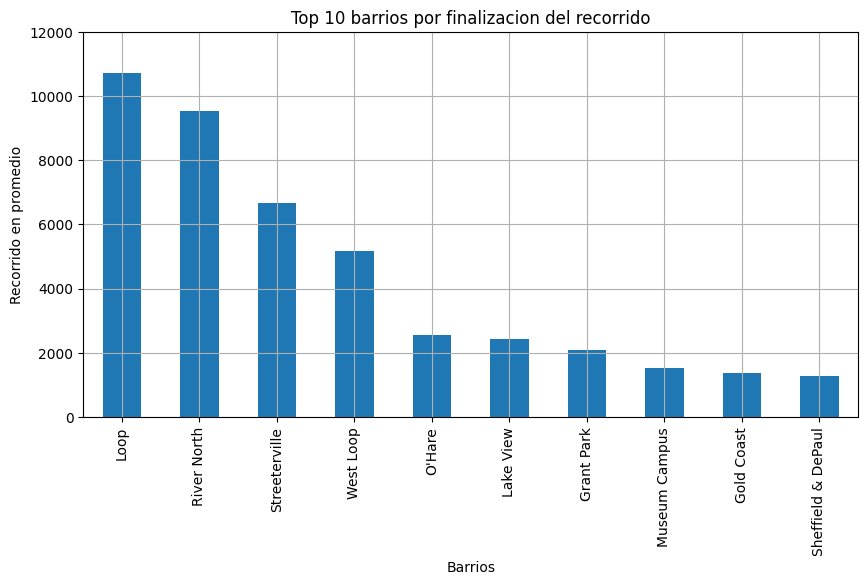

In [12]:
# Graficar las observaciones
ax = top_neighborhoods.head(10).plot(
    title= 'Top 10 barrios por finalizacion del recorrido',
    kind= "bar",
    figsize=(10,5),
    grid=True,
    ylim=(0,12000),
    xlabel="Barrios",
    ylabel="Recorrido en promedio"
)
plt.show()

### 3.2 Principales empresas de taxis por numeros de viajes 

In [13]:
# Empresas de taxis y numeros de viajes
# Identificar empresas de taxis por sus numeros de viajes.
top_companies_trips = df_companies.groupby(by='company_name')['trips_amount'].sum()
top_companies_trips = top_companies_trips.sort_values(ascending=False)
print(top_companies_trips.head(10))

company_name
Flash Cab                            19558
Taxi Affiliation Services            11422
Medallion Leasin                     10367
Yellow Cab                            9888
Taxi Affiliation Service Yellow       9299
Chicago Carriage Cab Corp             9181
City Service                          8448
Sun Taxi                              7701
Star North Management LLC             7455
Blue Ribbon Taxi Association Inc.     5953
Name: trips_amount, dtype: int64


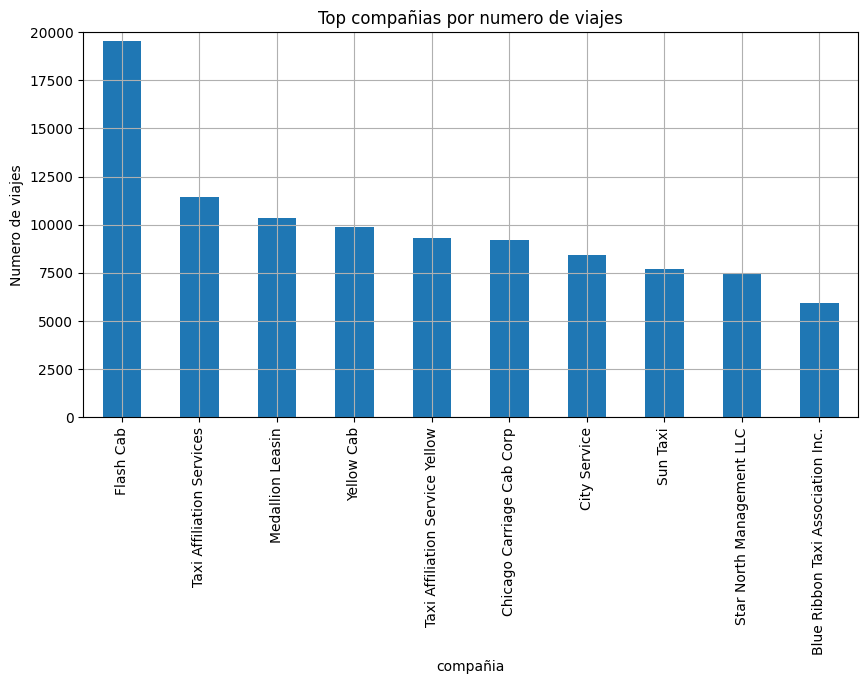

In [14]:
# Graficar las observaciones
ax = top_companies_trips.head(10).plot(
    title= 'Top compañias por numero de viajes',
    kind= "bar",
    figsize=(10,5),
    grid=True,
    ylim=(0,20000),
    xlabel="compañia",
    ylabel="Numero de viajes"
)
plt.show()

La conclusion, tomando como referencia el analisis de las graficas se pueden considerar las siguientes cosas: <br>
De los principales destinos para la finalizacion del recorrido, se muentran: <br>
- Loop
- River North
- Streeterville
- West Loop

Como los destinos preferidos por los usuarios para finalizar su recorrido. Estos 4 destinos se muestran por arriba de 5000, mientras que los otros 6 destinos se muestran entre 1250 - 2500. Loop, como se comento, se muestra como el destino preferido, con una media de casi 11,000. <br>
<br>
Respecto a la grafica de top compañias por numero de viajes, Flash Cab se muestra como la preferida, mostrando un amplio favoritismo sobre el resto de compañias, mostrando 19558 viajes, versus Taxi Affiliation Services (segundo lugar), con 11422 viajes.

# 4. Prueba de Hipotesis

Hipotesis: <br>

- H0: No existe diferencia entre La duracion promedio de los viajes, desde el Loop hasta el Aeropuerto Internacional en sabados lluviosos y sabados no lluviosos.
- H1: Existe diferencia entre La duracion promedio de los viajes, desde el Loop hasta el Aeropuerto Internacional en sabados lluviosos y sabados no lluviosos.

In [ ]:
# Nivel de Significancia
alpha = 0.05

# Filtrar resultados solo por los sabados
df_saturday = df_loop_ohare[df_loop_ohare['start_ts'].dt.weekday == 5]
print(df_saturday)

# Separar por sabados lluviosos y no lluviosos
saturday_rain = df_saturday[df_saturday['weather_conditions'] == 'Bad']['duration_seconds']
saturday_no_rain = df_saturday[df_saturday['weather_conditions'] == 'Good']['duration_seconds']

# Resolucion de Hipotesis
# Evaluacion de varianzas mediante prueba de Levene
statistics, p_value = stats.levene(saturday_rain, saturday_no_rain)
print(f'Valor para la prueba de Levene es: {p_value: .5f}')
if (p_value < alpha):
    print("Se rechaza la hipotesis nula, dado que las varianzas son Distintas")
else:
    print("No se rechaza la hipotesis nula, dado que las varianzas no son Distintas")
print()

# Para este caso, mediante la evaluacion de varianzas (prueba de Levene), se demostro que las varianzas no son distintas.
# Entonces, se utilizara para demostrar las hipotesis, la prueba t de 2 colas
t_stat, p_value = stats.ttest_ind(saturday_rain, saturday_no_rain, equal_var=False)
print(f'El resultado estadistico es: {t_stat: .10f}')
print(f'El p_value es: {p_value: .18f}')
print()

if p_value < alpha:
    print("Se rechaza la hipotesis nula, dado que existe una diferencia entre la duracion promedio de los viajes, en sabados lluviosos y no lluviosos")
else:
    print("No podemos rechazar la hipotesis nula, dado que no hay suficiente evidencia que compruebe, que no existe diferencia entre la duracion promedio de los viajes, en sabados lluviosos y no lluviosos")

                start_ts weather_conditions  duration_seconds
0    2017-11-25 16:00:00               Good              2410
1    2017-11-25 14:00:00               Good              1920
2    2017-11-25 12:00:00               Good              1543
3    2017-11-04 10:00:00               Good              2512
4    2017-11-11 07:00:00               Good              1440
...                  ...                ...               ...
1063 2017-11-25 11:00:00               Good                 0
1064 2017-11-11 10:00:00               Good              1318
1065 2017-11-11 13:00:00               Good              2100
1066 2017-11-11 08:00:00               Good              1380
1067 2017-11-04 16:00:00                Bad              2834

[1068 rows x 3 columns]
Valor para la prueba de Levene es:  0.53320
No se rechaza la hipotesis nula, dado que las varianzas no son Distintas

El resultado estadistico es:  7.1860342881
El p_value es:  0.000000000006738994

Se rechaza la hipotesis nula, da

# 5. Conclusion

Tras realizar una prueta "t", con 2 muestras independientes para la comparacion del tiempo promedio de los viajes, desde el punto A "Loop" al punto B "Aeropuerto Internacional O'Hare" durante los sabados lluviosos y no lluviosos, se obtivo un p_value de 0.000000000006738994, lo cual muestra una significancia mucho menor a la del nivel de significancia alpha = 0.05. <br>
<br>
Esto supone que, se rechaza la hipotesis nula porque si se muestra una fuerte evidencia entre los viajes realizados en los sabados lluviosos y no lluviosos. <br>
<br>
Como conclusion, el factor de la lluvia si tiene un efecto claro en el tiempo de viaje los sabados. Los recorridos desde el punto A al punto B se vuelven mas largos durante los sabados lluviosos.